In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('/Users/ziyon/Documents/Business Programming/Final Project/World Happiness Report 2022 - World Happiness Report 2022.csv')


# 非洲前五

In [2]:
df = pd.read_csv('/Users/ziyon/Documents/Business Programming/Final Project/africa.csv')

af5 = df.nlargest(5,'Happiness score')
af5

,RANK,Country,Continent,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,52,Mauritius,af,6.071,6.184,5.958,1.969,1.591,1.116,0.568,0.589,0.131,0.107
1,86,Libya*,af,5.330,5.543,5.118,1.544,1.476,0.943,0.606,0.477,0.106,0.179
2,88,Ivory Coast,af,5.235,5.384,5.085,2.652,1.094,0.442,0.322,0.451,0.149,0.124
3,91,South Africa,af,5.194,5.315,5.073,1.742,1.425,1.088,0.361,0.442,0.089,0.046
4,93,Gambia*,af,5.164,5.409,4.918,2.531,0.785,0.621,0.369,0.367,0.388,0.103


In [3]:
selected_columns = ['Country','Dystopia (1.83) + residual','GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Melt the DataFrame to convert the factors into a single column
melted_data = pd.melt(af5, id_vars='Country', value_vars=selected_columns[1:])
melted_data.head(5)

# Calculate the sums for each country
sums_by_country = melted_data.groupby('Country')['value'].transform('sum')

# Assign the sums as the "Happiness Score" column
melted_data['Happiness Score'] = sums_by_country

# Display the updated DataFrame
melted_data

,Country,variable,value,Happiness Score
0,Mauritius,Dystopia (1.83) + residual,1.969,6.071
1,Libya*,Dystopia (1.83) + residual,1.544,5.331
2,Ivory Coast,Dystopia (1.83) + residual,2.652,5.234
3,South Africa,Dystopia (1.83) + residual,1.742,5.193
4,Gambia*,Dystopia (1.83) + residual,2.531,5.164
5,Mauritius,GDP per capita,1.591,6.071
6,Libya*,GDP per capita,1.476,5.331
7,Ivory Coast,GDP per capita,1.094,5.234
8,South Africa,GDP per capita,1.425,5.193
9,Gambia*,GDP per capita,0.785,5.164


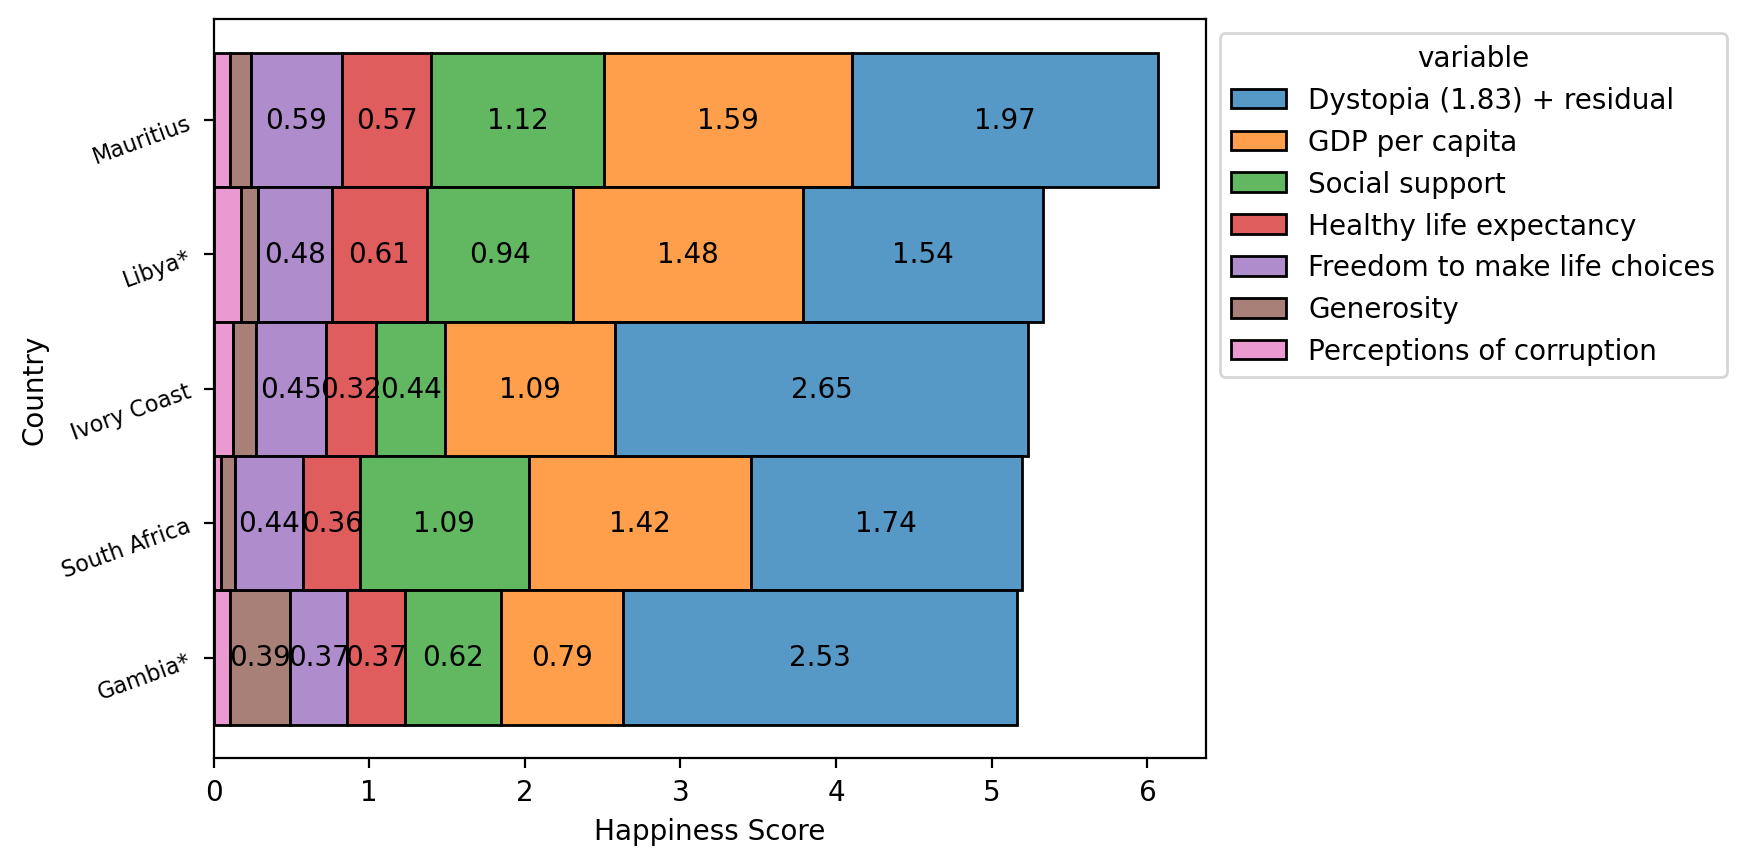

In [4]:
stacked_plot = sns.histplot(data=melted_data, y='Country', hue='variable', weights='value', multiple='stack')
stacked_plot

#sns.histplot(data=penguins, y="flipper_length_mm")

# Set the labels and legend
stacked_plot.set_ylabel('Country')
stacked_plot.set_xlabel('Happiness Score')

#remove the legend
#stacked_plot.legend_.remove()

#move the legend out of the plot
sns.move_legend(stacked_plot, "upper left", bbox_to_anchor=(1, 1))


stacked_plot.tick_params(axis='y',labelsize=8,rotation=20)


# iterate through each container
for c in stacked_plot.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_width(),2) if v.get_width() > 0.3 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    stacked_plot.bar_label(c, labels=labels, label_type='center')

# 北美洲

In [6]:
df = pd.read_csv('/Users/ziyon/Documents/Business Programming/Final Project/World Happiness Report 2022 - World Happiness Report 2022.csv')

na5 = df[df['Continent']=='na'].nlargest(5,'Happiness score')
na5

,RANK,Country,Continent,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
14,15,Canada,na,7.025,7.107,6.943,1.924,1.886,1.188,0.783,0.659,0.217,0.368
15,16,United States,na,6.977,7.065,6.888,2.214,1.982,1.182,0.628,0.574,0.220,0.177
22,23,Costa Rica,na,6.582,6.683,6.481,2.346,1.584,1.054,0.744,0.661,0.089,0.102
36,37,Panama,na,6.309,6.464,6.154,2.086,1.715,1.107,0.709,0.592,0.049,0.051
38,39,Guatemala*,na,6.262,6.460,6.064,2.746,1.274,0.831,0.522,0.662,0.112,0.115


In [9]:
selected_columns = ['Country','Dystopia (1.83) + residual','GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Melt the DataFrame to convert the factors into a single column
melted_data = pd.melt(na5, id_vars='Country', value_vars=selected_columns[1:])
melted_data.head(5)

# Calculate the sums for each country
sums_by_country = melted_data.groupby('Country')['value'].transform('sum')

# Assign the sums as the "Happiness Score" column
melted_data['Happiness Score'] = sums_by_country

# Display the updated DataFrame
melted_data

,Country,variable,value,Happiness Score
0,Canada,Dystopia (1.83) + residual,1.924,7.025
1,United States,Dystopia (1.83) + residual,2.214,6.977
2,Costa Rica,Dystopia (1.83) + residual,2.346,6.580
3,Panama,Dystopia (1.83) + residual,2.086,6.309
4,Guatemala*,Dystopia (1.83) + residual,2.746,6.262
5,Canada,GDP per capita,1.886,7.025
6,United States,GDP per capita,1.982,6.977
7,Costa Rica,GDP per capita,1.584,6.580
8,Panama,GDP per capita,1.715,6.309
9,Guatemala*,GDP per capita,1.274,6.262


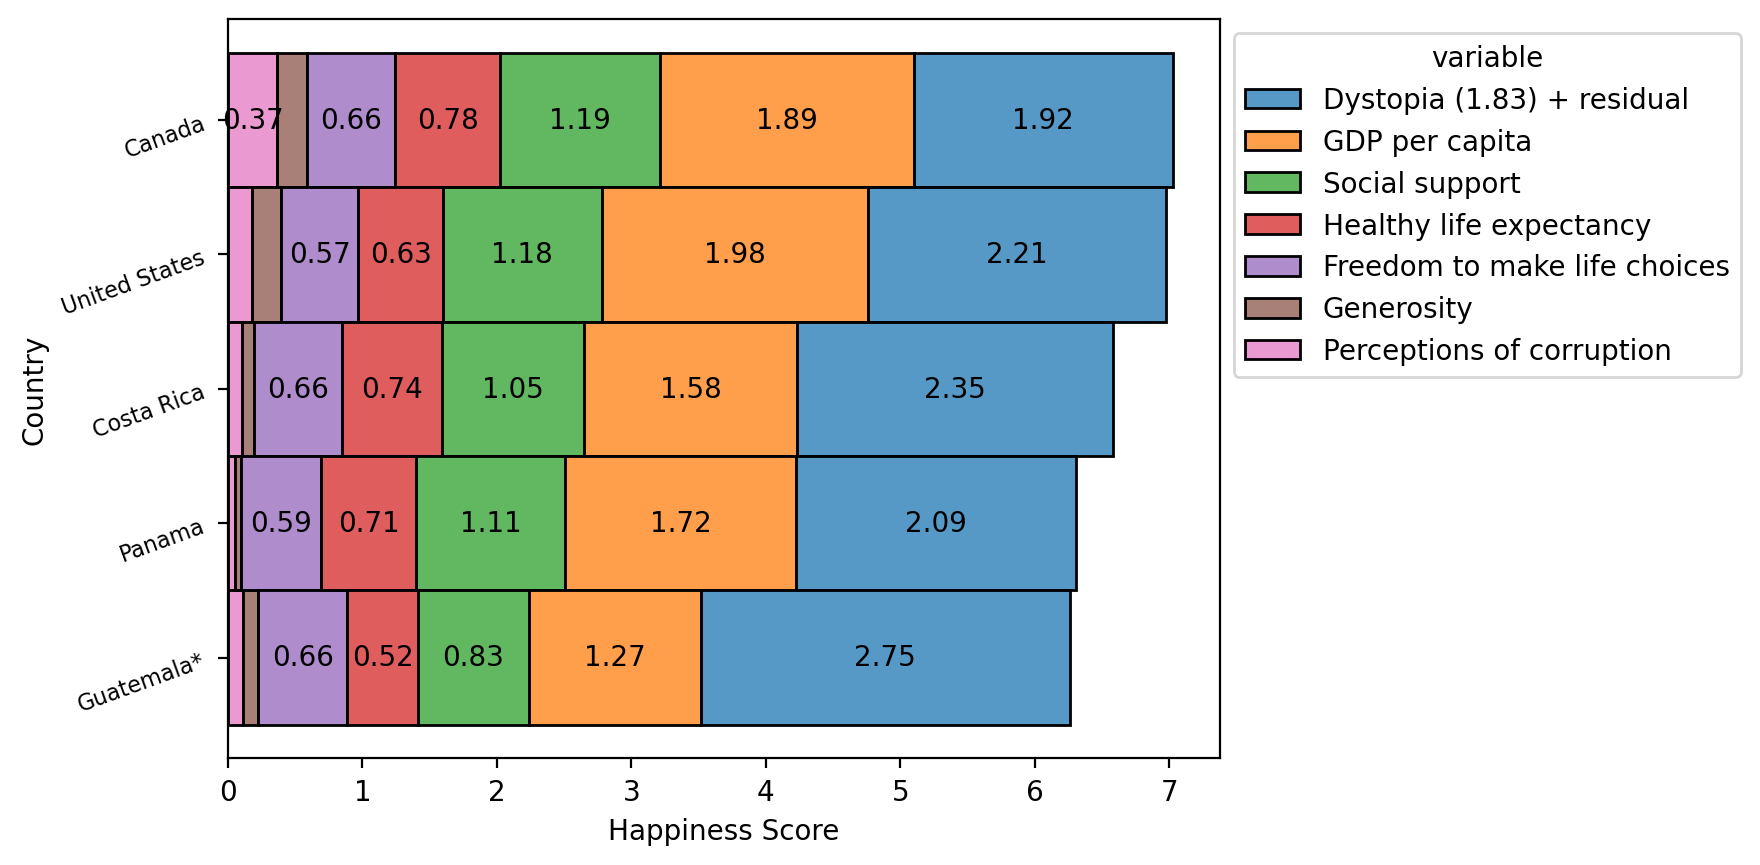

In [10]:
stacked_plot = sns.histplot(data=melted_data, y='Country', hue='variable', weights='value', multiple='stack')
stacked_plot

#sns.histplot(data=penguins, y="flipper_length_mm")

# Set the labels and legend
stacked_plot.set_ylabel('Country')
stacked_plot.set_xlabel('Happiness Score')

#remove the legend
#stacked_plot.legend_.remove()

#move the legend out of the plot
sns.move_legend(stacked_plot, "upper left", bbox_to_anchor=(1, 1))


stacked_plot.tick_params(axis='y',labelsize=8,rotation=20)


# iterate through each container
for c in stacked_plot.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_width(),2) if v.get_width() > 0.3 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    stacked_plot.bar_label(c, labels=labels, label_type='center')

# 南美洲

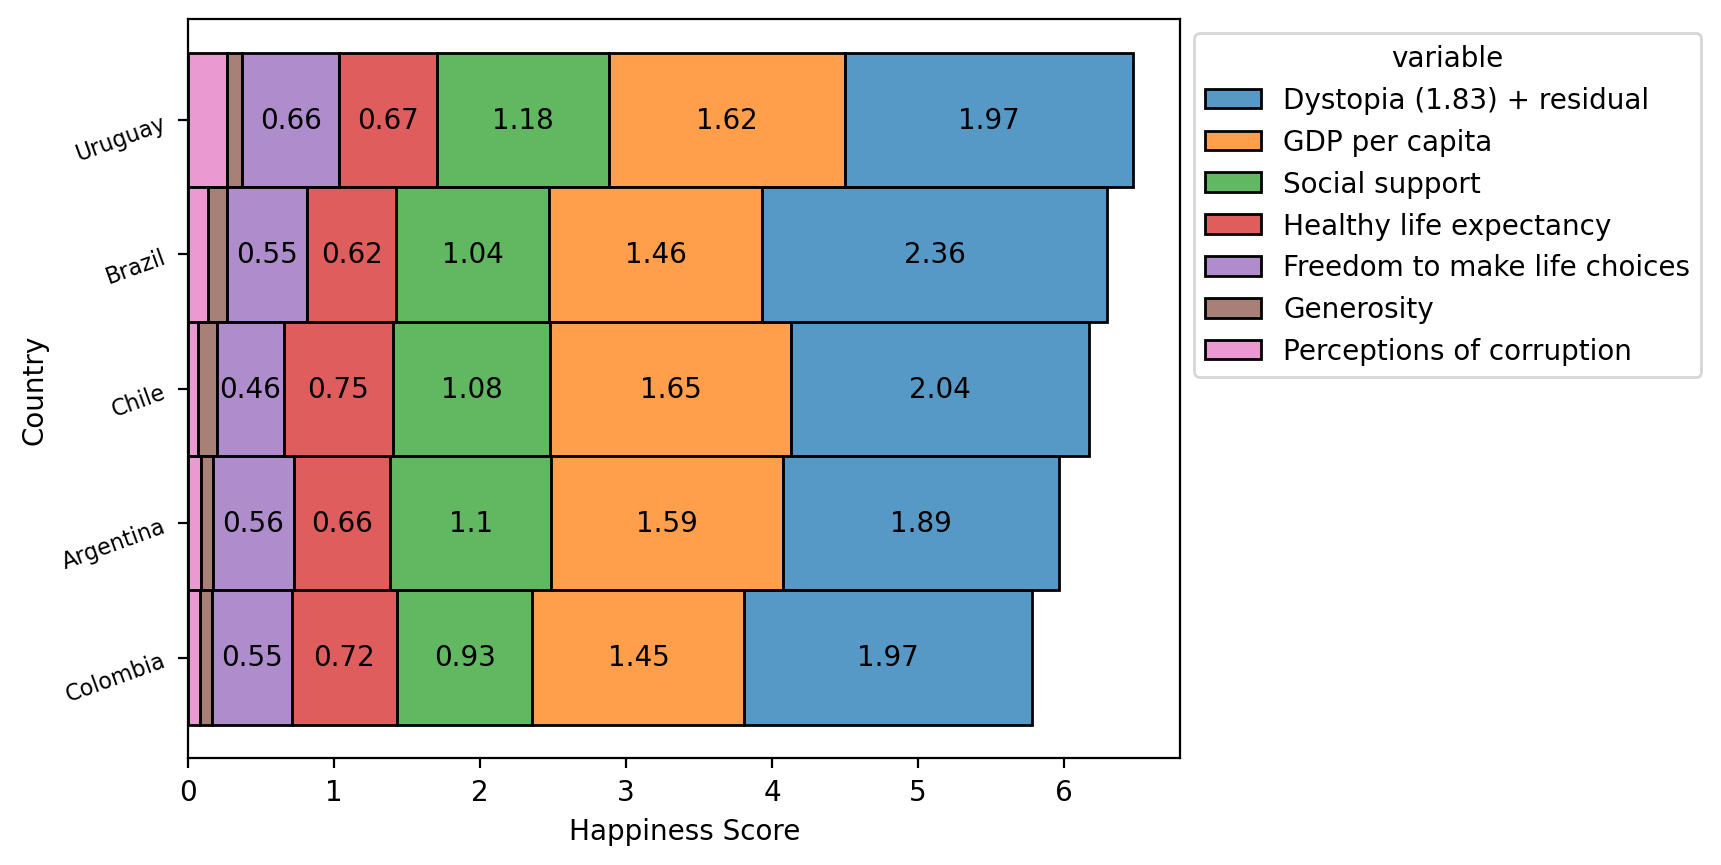

In [11]:
df = pd.read_csv('/Users/ziyon/Documents/Business Programming/Final Project/World Happiness Report 2022 - World Happiness Report 2022.csv')

na5 = df[df['Continent']=='sa'].nlargest(5,'Happiness score')
na5

selected_columns = ['Country','Dystopia (1.83) + residual','GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Melt the DataFrame to convert the factors into a single column
melted_data = pd.melt(na5, id_vars='Country', value_vars=selected_columns[1:])
melted_data.head(5)

# Calculate the sums for each country
sums_by_country = melted_data.groupby('Country')['value'].transform('sum')

# Assign the sums as the "Happiness Score" column
melted_data['Happiness Score'] = sums_by_country

# Display the updated DataFrame
melted_data




stacked_plot = sns.histplot(data=melted_data, y='Country', hue='variable', weights='value', multiple='stack')
stacked_plot

#sns.histplot(data=penguins, y="flipper_length_mm")

# Set the labels and legend
stacked_plot.set_ylabel('Country')
stacked_plot.set_xlabel('Happiness Score')

#remove the legend
#stacked_plot.legend_.remove()

#move the legend out of the plot
sns.move_legend(stacked_plot, "upper left", bbox_to_anchor=(1, 1))


stacked_plot.tick_params(axis='y',labelsize=8,rotation=20)


# iterate through each container
for c in stacked_plot.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_width(),2) if v.get_width() > 0.3 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    stacked_plot.bar_label(c, labels=labels, label_type='center')